**1. Load the Dataset**

In [2]:
import pandas as pd
df = pd.read_csv('/content/Churn_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**2.Perform Below Visualizations**

**Univariate Analysis**

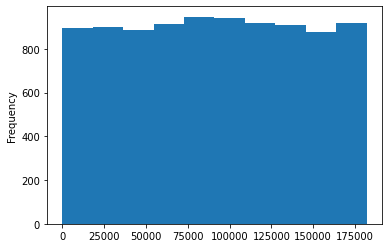

In [3]:
import matplotlib.pyplot as plt

df[df['EstimatedSalary'] < 182012.4]['EstimatedSalary'].plot.hist()


In [5]:
df[df['EstimatedSalary'] > 150000]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
13,14,15691483,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0
18,19,15661507,Muldrow,587,Spain,Male,45,6,0.00,1,0,0,158684.81,0
20,21,15577657,McDonald,732,France,Male,41,8,0.00,2,1,1,170886.17,0
24,25,15625047,Yen,846,France,Female,38,5,0.00,1,1,1,187616.16,0
26,27,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,9979,15703563,P'eng,774,France,Male,40,9,93017.47,2,1,0,191608.97,0
9983,9984,15656710,Cocci,613,France,Male,40,4,0.00,1,0,0,151325.24,0
9989,9990,15605622,McMillan,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0


**Bi - Variate Analysis**

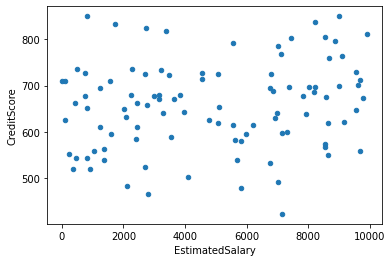

In [6]:
df[df['EstimatedSalary'] < 10000].sample(100).plot.scatter(x='EstimatedSalary', y='CreditScore')

**Multi - Variate Analysis**

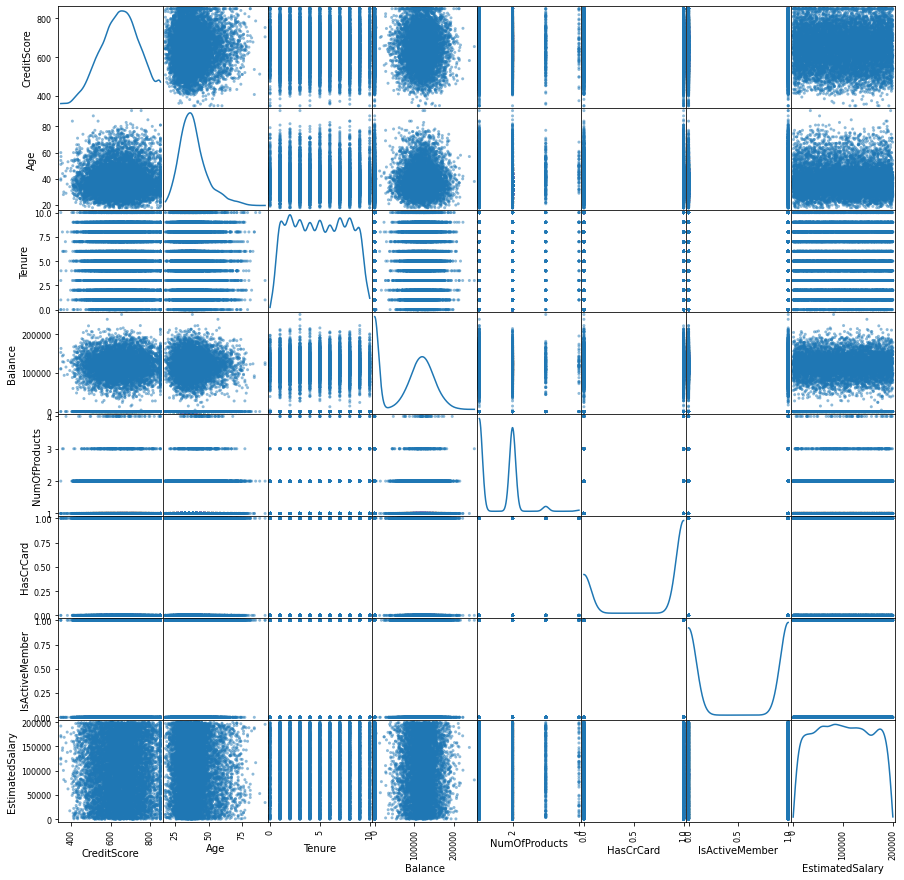

In [10]:
pd.plotting.scatter_matrix(df.loc[:, "CreditScore":"EstimatedSalary"], diagonal="kde",figsize=(15,15))
plt.show()

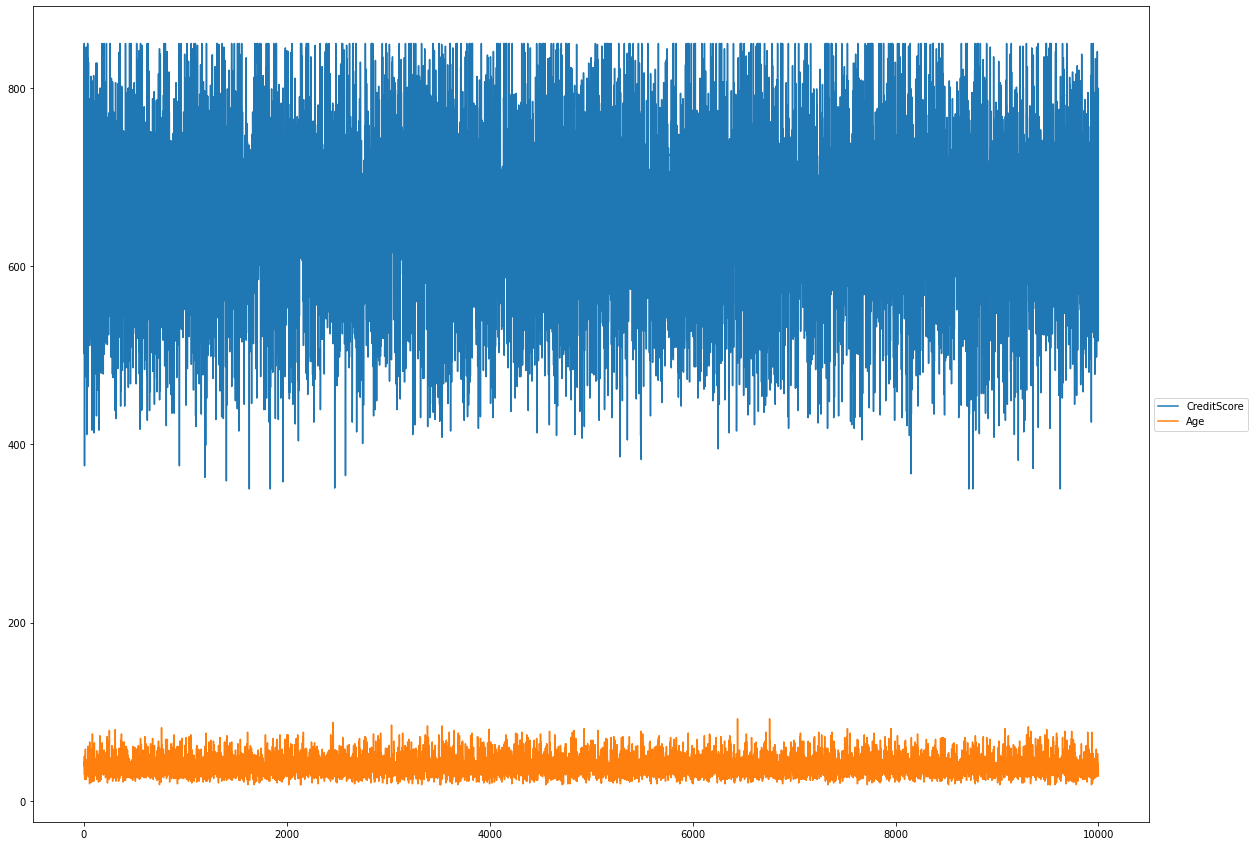

In [8]:
ax = df[["CreditScore","Age"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

**3. Perform descriptive statistics on the dataset**

In [11]:
import numpy as np
print(df['EstimatedSalary'].mean())

100090.239881


In [12]:
import numpy as np
print(df['EstimatedSalary'].sum())

1000902398.8100001


**4. Handle the Missing values**

In [13]:
missing_values_count = df.isnull().sum()
missing_values_count[0:15]

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**5. Find the outliers and replace the outliers**

In [14]:
median = float(df['Tenure'].median())
df["Tenure"] = np.where(df["Tenure"] > median, median, df['Tenure'])
print(median)

5.0


**6. Check for Categorical columns and perform encoding**

In [15]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,5.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [16]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,5.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,5.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4.0,130142.79,1,1,0,38190.78,0


**7. Split the data into dependent and independent variables**

Independent Variables

In [17]:
X = df.iloc[:, :-1].values
print(X)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


Dependent Variables

In [18]:
Y = df.iloc[:, -1].values
print(Y)

[1 0 1 ... 1 1 0]


**8. Scale the independent variables**

In [23]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df[["Age", "Tenure"]] = min_max_scaler.fit_transform(df[["Age", "Tenure"]])
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  \
0             1    15634602   Hargrave          619    France  Female   
1             2    15647311       Hill          608     Spain  Female   
2             3    15619304       Onio          502    France  Female   
3             4    15701354       Boni          699    France  Female   
4             5    15737888   Mitchell          850     Spain  Female   
...         ...         ...        ...          ...       ...     ...   
9995       9996    15606229   Obijiaku          771    France    Male   
9996       9997    15569892  Johnstone          516    France    Male   
9997       9998    15584532        Liu          709    France  Female   
9998       9999    15682355  Sabbatini          772   Germany    Male   
9999      10000    15628319     Walker          792    France  Female   

           Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     0.324324     0.4       0.00           

**10. Split the data into training and testing**

In [24]:
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)
print(training_data)

      RowNumber  CustomerId       Surname  CreditScore Geography  Gender  \
3555       3556    15629094         Fomin          528    France  Female   
4078       4079    15690440        Stiles          656     Spain    Male   
8445       8446    15678333  Parry-Okeden          683    France  Female   
5939       5940    15709861            He          766   Germany    Male   
5583       5584    15620579          Dunn          695     Spain  Female   
...         ...         ...           ...          ...       ...     ...   
805         806    15756026        Hooper          790     Spain  Female   
4169       4170    15716728       Basedow          513     Spain  Female   
588         589    15614782           Hao          526    France    Male   
6968       6969    15721793          Chiu          510   Germany  Female   
2547       2548    15634772         Mario          682     Spain  Female   

           Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
3555  0.

In [25]:
print(testing_data)

      RowNumber  CustomerId   Surname  CreditScore Geography  Gender  \
8             9    15792365        He          501    France    Male   
14           15    15600882     Scott          635     Spain  Female   
23           24    15725737    Mosman          669    France    Male   
25           26    15738191   Maclean          577    France    Male   
26           27    15736816     Young          756   Germany    Male   
...         ...         ...       ...          ...       ...     ...   
9954       9955    15739850  Trentino          645    France    Male   
9959       9960    15677783    Graham          764     Spain    Male   
9986       9987    15581736  Bartlett          673   Germany    Male   
9988       9989    15589329   Pirozzi          775    France    Male   
9995       9996    15606229  Obijiaku          771    France    Male   

           Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
8     0.351351     0.8  142051.07              2        